# Mathematical model of the transient expression of TCSn

## Import Libraries

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

##Definition of the model

We defined the model as follows.

$${Cyt}=a_0+a_1t+a_2t^2+a_3t^3+a_4t^4+a_5t^5$$

$$\frac{d}{dt}{AHKs}=\frac{{{p}_{AHKs}} \cdot {{{B\text{-}ARRs}{P}}}}{{{K}_{bp} +  {{{B\text{-}ARRs}{P}}}}} + {p}_{{AHKs}{b}} - \frac{d}{dt}{{AHKs}{P}} -{d}_{AHKs} \cdot {({AHKs}+{AHKs}{P})} \cdot {AHKs},$$

$$\frac{d}{dt}{{AHKs}{P}}={{t}_{AHKs}} \cdot \frac{{Cyt}}{{K}_{Cyt}+{Cyt}} \cdot {AHKs} - \frac{{{t}_{A\text{-}ARRs}} \cdot {A\text{-}ARRs} +{{t}_{B\text{-}ARRs}} \cdot {B\text{-}ARRs} }{{K_m} + {B\text{-}ARRs} + {A\text{-}ARRs}} {{AHKs}{P}},$$

$$\frac{d}{dt}{{B\text{-}ARRs}}={{d}_{{B\text{-}ARRs}{P}}} \cdot {{B\text{-}ARRs}{P}}-\frac{{{t}_{B\text{-}ARRs}} \cdot {B\text{-}ARRs} }{{K_m} + {B\text{-}ARRs} + {A\text{-}ARRs}}{{AHKs}{P}},$$

$$\frac{d}{dt}{{B\text{-}ARRs}{P}}=-\frac{d}{dt}{{B\text{-}ARRs}},$$

$$\frac{d}{dt}{{A\text{-}ARRs}}=\frac{{{p}_{{A\text{-}ARRs}}} \cdot {{{B\text{-}ARRs}{P}}}}{{{K}_{a}}+{{B\text{-}ARRs}{P}}}-\frac{d}{dt}{{A\text{-}ARRs}{P}} - {d}_{A\text{-}ARRs} \cdot {A\text{-}ARRs},$$

$$\frac{d}{dt}{{A\text{-}ARRs}{P}}=\frac{{{t}_{A\text{-}ARRs}} \cdot {A\text{-}ARRs}}{{K_m} + {B\text{-}ARRs} + {A\text{-}ARRs}}{{AHKs}{P}} - {d}_{{A\text{-}ARRs}{P}} \cdot {{A\text{-}ARRs}{P}},$$

$$\frac{d}{dt}{TCSn}={{p}_{TCSn}} \cdot {{{B\text{-}ARRs}{P}}} - {d}_{TCSn} \cdot {TCSn}.$$

In [2]:
def ODE_Cytokinin(state, t):
  B_ARRs_P, AHKs, AHKs_P, A_ARRs, A_ARRs_P, TCSn = state

  Cyt = a[0] + a[1] * t + a[2] * (t ** 2) + a[3] * (t ** 3) + a[4] * (t ** 4) + a[5] * (t ** 5)

  B_ARRs = B_ARRs_tot - B_ARRs_P

  dB_ARRs_P_dt = - d_ARRs_P * B_ARRs_P + t_ARRs * B_ARRs / (Km + B_ARRs + A_ARRs) * AHKs_P

  dAHKs_P_dt = t_AHKs * Cyt / (Kcyt + Cyt) * AHKs - t_ARRs * (B_ARRs + A_ARRs) / (Km + B_ARRs + A_ARRs) * AHKs_P
  dAHKs_dt = p_AHKs * B_ARRs_P / (Kbp + B_ARRs_P) + p_AHKs_base  - dAHKs_P_dt - d_AHKs * (AHKs + AHKs_P) * AHKs

  dA_ARRs_P_dt = t_ARRs * A_ARRs / (Km + B_ARRs + A_ARRs) * AHKs_P - d_ARRs_P * A_ARRs_P
  dA_ARRs_dt = p_A_ARRs * B_ARRs_P / (Ka + B_ARRs_P) - dA_ARRs_P_dt - d_A_ARRs * A_ARRs

  dTCSn_dt = p_TCSn * B_ARRs_P - d_TCSn * TCSn

  return [dB_ARRs_P_dt, dAHKs_dt, dAHKs_P_dt, dA_ARRs_dt, dA_ARRs_P_dt, dTCSn_dt]

def runge_kutta4(f, y0, t):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0

    for i in range(1, n):
        dt = t[i] - t[i-1]
        k1 = np.array(f(y[i-1], t[i-1]))
        k2 = np.array(f(y[i-1] + 0.5 * dt * k1, t[i-1] + 0.5 * dt))
        k3 = np.array(f(y[i-1] + 0.5 * dt * k2, t[i-1] + 0.5 * dt))
        k4 = np.array(f(y[i-1] + dt * k3, t[i-1] + dt))
        y[i] = y[i-1] + (dt / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
        y[i][y[i] < 0] = 0

    return y

In [3]:
# Parameter Settings
a=[0.1894,-0.02866,0.002669,-0.00005479,0.0000005124,-0.000000001797]

AHKs_ini = 60
AHKs_P_iniratio = 0.000259232

TCSn_ini = 30
B_ARRs_tot = 76.5287
B_ARRs_P_iniratio = 0.0
A_ARRs_ini = 50.0592
A_ARRs_P_iniratio = 0.00023976

p_AHKs = 253.271
p_AHKs_base = 0.000312319
t_AHKs = 19.1776
d_AHKs = 0.837665

t_ARRs = 0.0923777
d_ARRs_P = t_ARRs * 1.71492

p_A_ARRs = 8.45846
d_A_ARRs= p_A_ARRs * (6.67826 * (10 ** -8))

Kcyt = 2.57727 * (10 ** -5)
Kbp = 85.7202
Km = 0.00310143
Ka = 37.1887


p_TCSn = 2.82286
d_TCSn = 0.10176

##Numerical simulation

In [5]:
# Setting initial conditions and the timestep.
y0 = [B_ARRs_tot * B_ARRs_P_iniratio, AHKs_ini * (1- AHKs_P_iniratio), AHKs_ini * AHKs_P_iniratio, A_ARRs_ini* (1 - A_ARRs_P_iniratio), A_ARRs_ini* A_ARRs_P_iniratio, TCSn_ini] 
t = np.linspace(0, 120, 120000) 

# Simulation step.
solution = runge_kutta4(ODE_Cytokinin, y0, t)

# Cytokinin calculation step.
Cyt_list = a[0] + a[1] * t + a[2] * (t ** 2) + a[3] * (t ** 3) + a[4] * (t ** 4) + a[5] * (t ** 5)

##Drawing plots

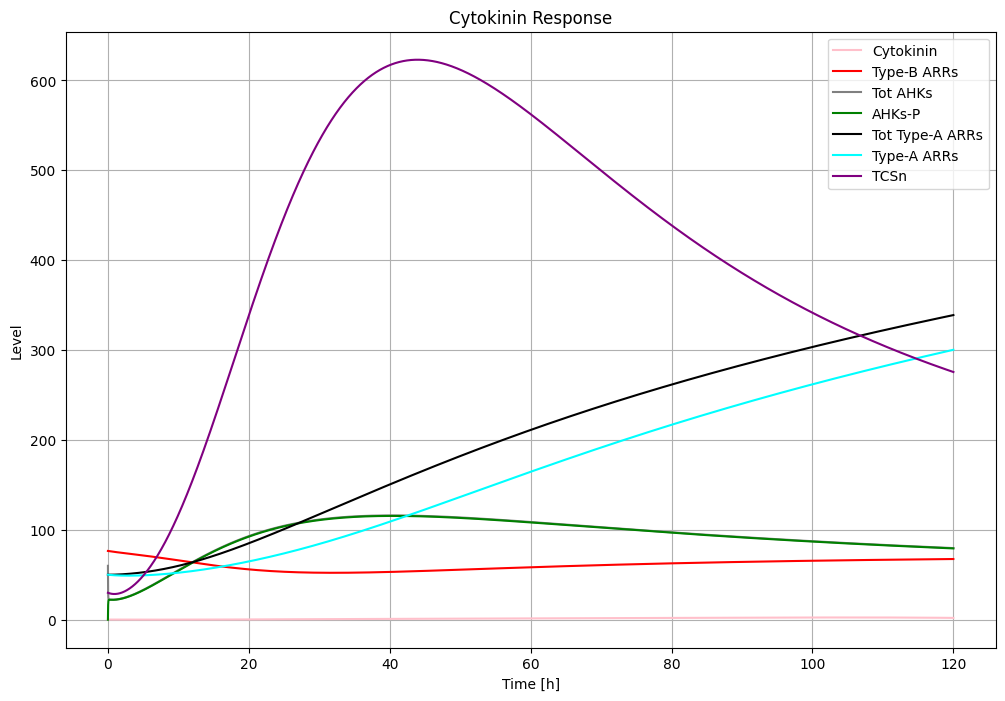

In [6]:
plt.figure(figsize=(12, 8))

plt.plot(t[:],Cyt_list[:]*1, label = 'Cytokinin', color='pink')
plt.plot(t[:], B_ARRs_tot-solution[:, 0], label='Type-B ARRs', color='r')
plt.plot(t[:], solution[:, 1] + solution[:, 2] , label='Tot AHKs', color='grey')
#plt.plot(t[:], solution[:, 1], label='AHKs', color='b')
plt.plot(t[:], solution[:, 2], label='AHKs-P', color='g')
plt.plot(t[:], solution[:, 3] + solution[:, 4], label='Tot Type-A ARRs', color='black')
plt.plot(t[:], solution[:, 3], label='Type-A ARRs', color='cyan')
#plt.plot(t[:], solution[:, 4], label='Type-A ARRs-P', color='magenta')
plt.plot(t[:], solution[:, 5], label='TCSn', color='purple')
plt.xlabel('Time [h]')
plt.ylabel('Level')
plt.title('Cytokinin Response')
plt.legend()
plt.grid(True)

plt.show()